Connected to tracking-barbell-exercises (Python 3.8.15)

In [ ]:
from LearningAlgorithms import ClassificationAlgorithms

In [ ]:
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import itertools

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df = pd.read_csv("../../data/interim/03_data_features.pkl")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [ ]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_10,gyr_r_freq_0.5_Hz_ws_10,gyr_r_freq_1.0_Hz_ws_10,gyr_r_freq_1.5_Hz_ws_10,gyr_r_freq_2.0_Hz_ws_10,gyr_r_freq_2.5_Hz_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:07.200,-0.184406,1.191320,-0.089841,-2.909911,-4.351316,0.705733,B,bench,heavy,30,...,0.0,-0.136751,0.564272,133.196702,-42.427265,2.411500,-30.342719,1.849433,19.634468,2
2019-01-11 15:08:07.600,-0.213832,0.949878,-0.202177,19.366996,4.457358,-6.631511,B,bench,heavy,30,...,0.0,-0.562006,0.410389,178.702588,-36.753362,-1.171476,7.415823,-43.936650,12.313731,2
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.0,-1.412406,0.275199,227.240981,4.226955,-29.961646,-24.995679,-25.469276,-24.806084,2
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.0,0.394243,0.265031,239.228757,-2.647254,-8.055401,10.169316,62.790114,-5.981941,2
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.0,-0.252345,0.438846,188.596463,-50.766775,31.166498,11.029352,-4.106572,-21.256868,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.0,-0.794473,0.331417,266.657437,36.225984,8.025453,-5.891816,-53.193335,-33.687102,1
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.0,0.491161,0.282888,247.239569,-32.282988,7.707635,-0.565229,45.308299,24.892613,4
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.0,0.075185,0.304031,220.702226,-62.586458,-7.931142,6.532250,6.706750,11.670820,4


In [ ]:
df_train = df.drop(["participant", "category", "set"], axis=1)

In [ ]:
df_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,duration,pca_1,pca_2,...,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_10,gyr_r_freq_0.5_Hz_ws_10,gyr_r_freq_1.0_Hz_ws_10,gyr_r_freq_1.5_Hz_ws_10,gyr_r_freq_2.0_Hz_ws_10,gyr_r_freq_2.5_Hz_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:07.200,-0.184406,1.191320,-0.089841,-2.909911,-4.351316,0.705733,bench,16.0,-0.406629,-0.113785,...,0.0,-0.136751,0.564272,133.196702,-42.427265,2.411500,-30.342719,1.849433,19.634468,2
2019-01-11 15:08:07.600,-0.213832,0.949878,-0.202177,19.366996,4.457358,-6.631511,bench,16.0,-0.329158,-0.192938,...,0.0,-0.562006,0.410389,178.702588,-36.753362,-1.171476,7.415823,-43.936650,12.313731,2
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,16.0,-0.311963,-0.167364,...,0.0,-1.412406,0.275199,227.240981,4.226955,-29.961646,-24.995679,-25.469276,-24.806084,2
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,16.0,-0.279209,-0.079385,...,0.0,0.394243,0.265031,239.228757,-2.647254,-8.055401,10.169316,62.790114,-5.981941,2
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,16.0,-0.328399,-0.066606,...,0.0,-0.252345,0.438846,188.596463,-50.766775,31.166498,11.029352,-4.106572,-21.256868,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,19.0,0.349738,-0.028197,...,0.0,-0.794473,0.331417,266.657437,36.225984,8.025453,-5.891816,-53.193335,-33.687102,1
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,19.0,0.419648,-0.179453,...,0.0,0.491161,0.282888,247.239569,-32.282988,7.707635,-0.565229,45.308299,24.892613,4
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,19.0,0.349351,-0.148450,...,0.0,0.075185,0.304031,220.702226,-62.586458,-7.931142,6.532250,6.706750,11.670820,4


In [ ]:
x = df_train.drop("label", axis=1)

In [ ]:
y = df_train["label"]

In [ ]:
x

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,duration,pca_1,pca_2,pca_3,...,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_10,gyr_r_freq_0.5_Hz_ws_10,gyr_r_freq_1.0_Hz_ws_10,gyr_r_freq_1.5_Hz_ws_10,gyr_r_freq_2.0_Hz_ws_10,gyr_r_freq_2.5_Hz_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:07.200,-0.184406,1.191320,-0.089841,-2.909911,-4.351316,0.705733,16.0,-0.406629,-0.113785,-0.003371,...,0.0,-0.136751,0.564272,133.196702,-42.427265,2.411500,-30.342719,1.849433,19.634468,2
2019-01-11 15:08:07.600,-0.213832,0.949878,-0.202177,19.366996,4.457358,-6.631511,16.0,-0.329158,-0.192938,0.011766,...,0.0,-0.562006,0.410389,178.702588,-36.753362,-1.171476,7.415823,-43.936650,12.313731,2
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,16.0,-0.311963,-0.167364,-0.013911,...,0.0,-1.412406,0.275199,227.240981,4.226955,-29.961646,-24.995679,-25.469276,-24.806084,2
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,16.0,-0.279209,-0.079385,0.045996,...,0.0,0.394243,0.265031,239.228757,-2.647254,-8.055401,10.169316,62.790114,-5.981941,2
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,16.0,-0.328399,-0.066606,0.032153,...,0.0,-0.252345,0.438846,188.596463,-50.766775,31.166498,11.029352,-4.106572,-21.256868,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,19.0,0.349738,-0.028197,-0.069053,...,0.0,-0.794473,0.331417,266.657437,36.225984,8.025453,-5.891816,-53.193335,-33.687102,1
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,19.0,0.419648,-0.179453,-0.048139,...,0.0,0.491161,0.282888,247.239569,-32.282988,7.707635,-0.565229,45.308299,24.892613,4
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,19.0,0.349351,-0.148450,-0.053031,...,0.0,0.075185,0.304031,220.702226,-62.586458,-7.931142,6.532250,6.706750,11.670820,4


In [ ]:
y

epoch (ms)
2019-01-11 15:08:07.200    bench
2019-01-11 15:08:07.600    bench
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:08.400    bench
2019-01-11 15:08:08.800    bench
                           ...  
2019-01-20 17:33:26.200      row
2019-01-20 17:33:26.600      row
2019-01-20 17:33:27.000      row
2019-01-20 17:33:27.400      row
2019-01-20 17:33:27.800      row
Name: label, Length: 4050, dtype: object

In [ ]:
df_train = df.drop(["participant", "category", "set"], axis=1)

In [ ]:
x = df_train.drop("label", axis=1)

In [ ]:
y = df_train["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

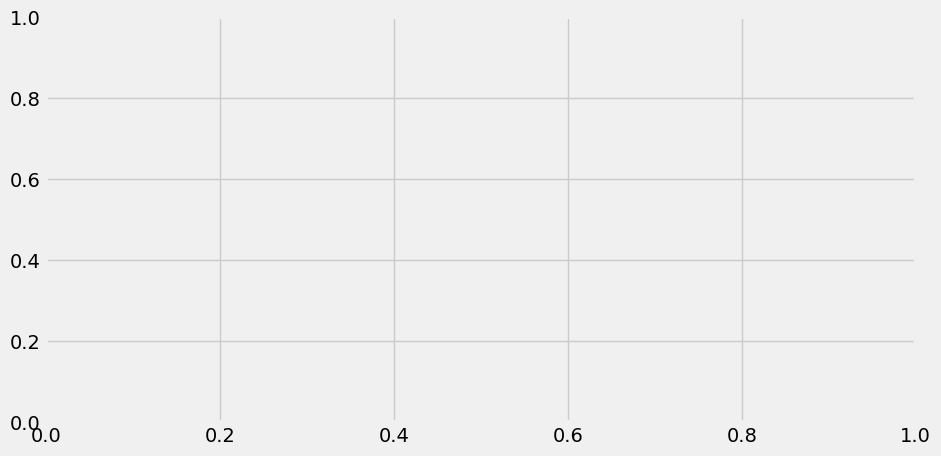

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

In [ ]:
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)

<AxesSubplot: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


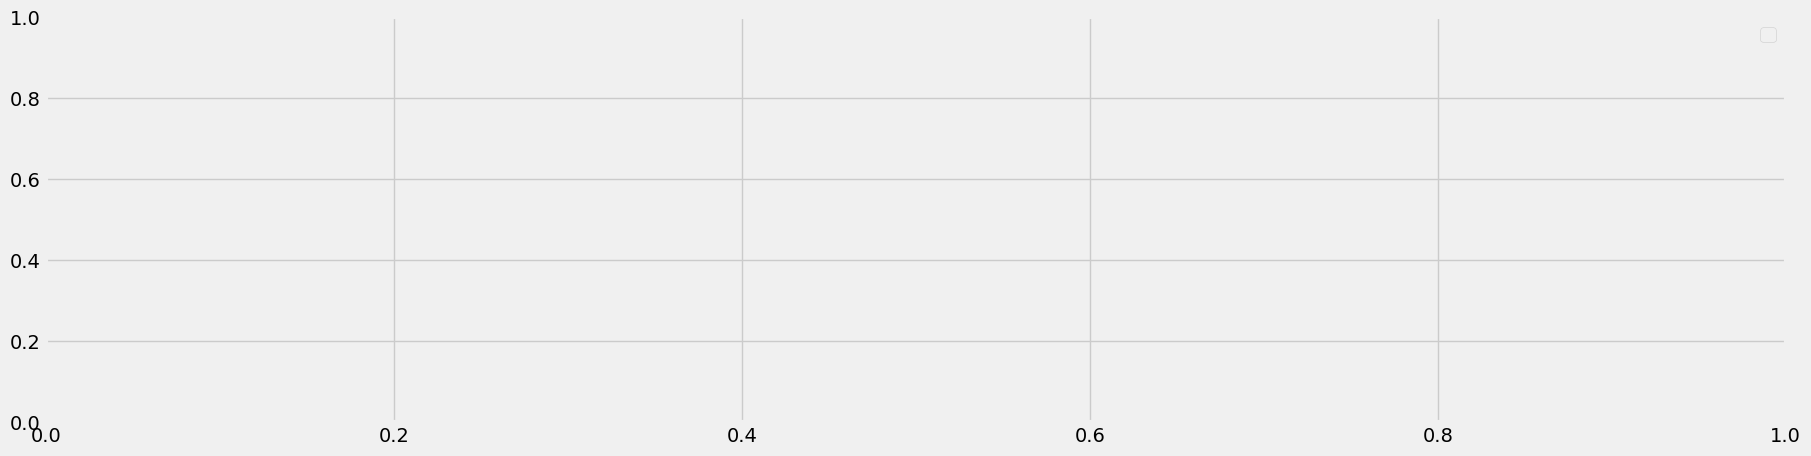

In [ ]:
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


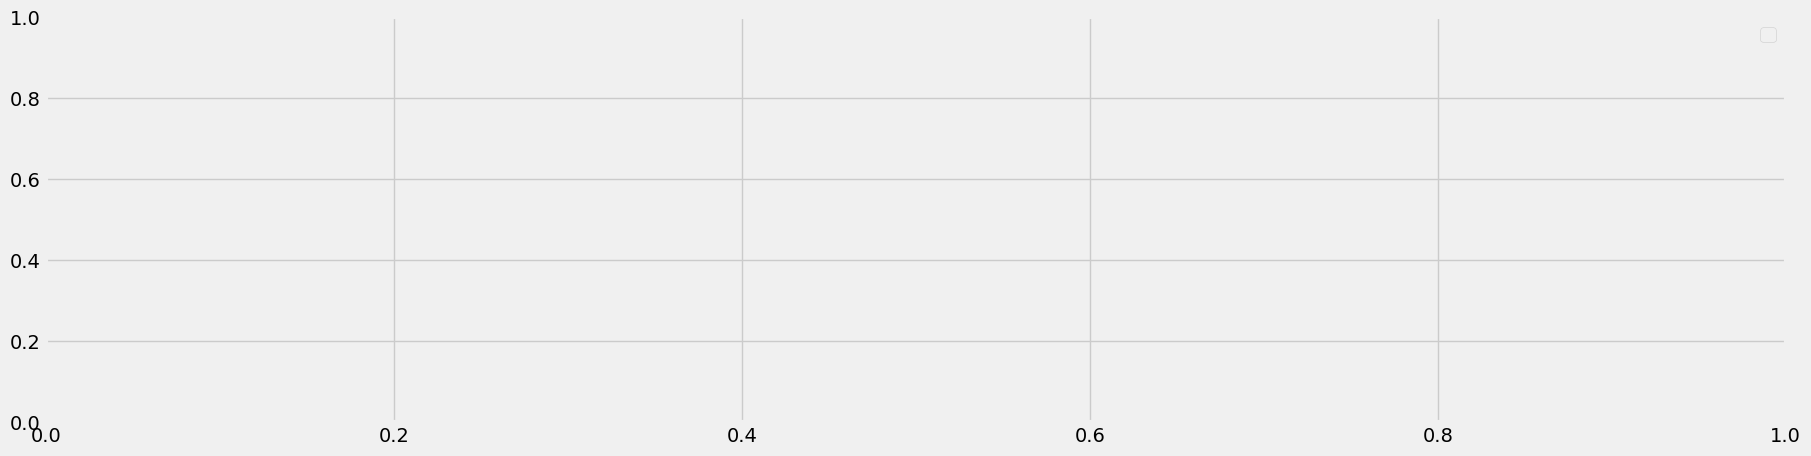

In [ ]:
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

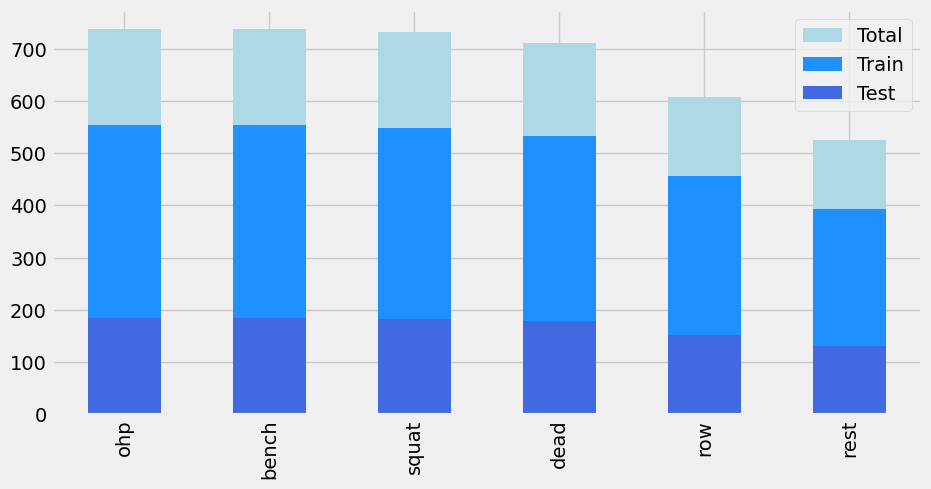

In [ ]:
df_train = df.drop(["participant", "category", "set"], axis=1)

x = df_train.drop("label", axis=1)
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'participant',
       'label', 'category', 'set',
       ...
       'gyr_r_max_freq', 'gyr_r_freq_weighted', 'gyr_r_pse',
       'gyr_r_freq_0.0_Hz_ws_10', 'gyr_r_freq_0.5_Hz_ws_10',
       'gyr_r_freq_1.0_Hz_ws_10', 'gyr_r_freq_1.5_Hz_ws_10',
       'gyr_r_freq_2.0_Hz_ws_10', 'gyr_r_freq_2.5_Hz_ws_10', 'cluster'],
      dtype='object', length=105)

In [ ]:
len(df.columns)

105

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if (("_freq" in f) or ("_pse" in f))]
cluster_features = ["cluster"]

In [ ]:
print("Basic features:", len(basic_features))

Basic features: 6


In [ ]:
print("Square features:", len(square_features))

Square features: 2


In [ ]:
print("PCA features:", len(pca_features))

PCA features: 3


In [ ]:
print("Time features:", len(time_features))

Time features: 16


In [ ]:
print("Frequency features:", len(freq_features))

Frequency features: 72


In [ ]:
print("Cluster features:", len(cluster_features))

Cluster features: 1


In [ ]:
print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 72
Cluster features: 1


In [ ]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [ ]:
learner = ClassificationAlgorithms()

In [ ]:
max_features = 10

In [ ]:
max_features = 10
selected_features, ordered_features, feature_scores = learner.forward_feature_selection(
    max_features, X_train, y_train
)

AttributeError: 'ClassificationAlgorithms' object has no attribute 'forward_feature_selection'

In [ ]:
max_features = 10

In [ ]:
selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, X_train, y_train
)

0
1
2
3
4
5
6
7
8
9


In [ ]:
ordered_features

['pca_1',
 'duration',
 'acc_x_freq_0.0_Hz_ws_10',
 'pca_2',
 'acc_z_freq_1.5_Hz_ws_10',
 'acc_z_pse',
 'acc_r_temp_mean_ws_5',
 'acc_z_freq_1.0_Hz_ws_10',
 'acc_r_freq_0.5_Hz_ws_10',
 'gyr_r_pse']

In [ ]:
selected_features

['pca_1',
 'duration',
 'acc_x_freq_0.0_Hz_ws_10',
 'pca_2',
 'acc_z_freq_1.5_Hz_ws_10',
 'acc_z_pse',
 'acc_r_temp_mean_ws_5',
 'acc_z_freq_1.0_Hz_ws_10',
 'acc_r_freq_0.5_Hz_ws_10',
 'gyr_r_pse']

In [ ]:
ordered_scores

[0.8919986829107672,
 0.9749753045768851,
 0.9976950938426078,
 0.9993414553836022,
 0.9996707276918011,
 0.9996707276918011,
 0.9996707276918011,
 0.9996707276918011,
 0.9996707276918011,
 0.9996707276918011]

In [ ]:
selected_features

['pca_1',
 'duration',
 'acc_x_freq_0.0_Hz_ws_10',
 'pca_2',
 'acc_z_freq_1.5_Hz_ws_10',
 'acc_z_pse',
 'acc_r_temp_mean_ws_5',
 'acc_z_freq_1.0_Hz_ws_10',
 'acc_r_freq_0.5_Hz_ws_10',
 'gyr_r_pse']

In [ ]:
selected_features = ['pca_1',
 'duration',
 'acc_x_freq_0.0_Hz_ws_10',
 'pca_2',
 'acc_z_freq_1.5_Hz_ws_10',
 'acc_z_pse',
 'acc_r_temp_mean_ws_5',
 'acc_z_freq_1.0_Hz_ws_10',
 'acc_r_freq_0.5_Hz_ws_10',
 'gyr_r_pse'
]

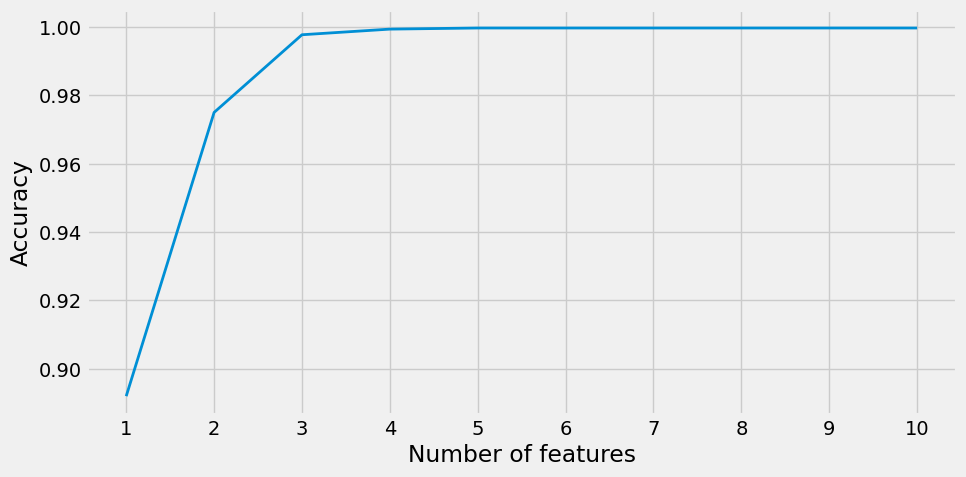

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [ ]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features",
]

iteration = 1
score_df = pd.DataFrame()

In [ ]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

In [ ]:
feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features",
]

In [ ]:
iterations = 1
score_df = pd.DataFrame()

In [ ]:
selected_features = ['pca_1',
 'duration',
 'acc_x_freq_0.0_Hz_ws_10',
 'pca_2',
 'acc_z_freq_1.5_Hz_ws_10',
 'acc_z_pse',
 'acc_r_temp_mean_ws_5',
 'acc_z_freq_1.0_Hz_ws_10',
 'acc_r_freq_0.5_Hz_ws_10',
 'gyr_r_pse'
]

In [ ]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

In [ ]:
feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features",
]

In [ ]:
iterations = 1
score_df = pd.DataFrame()

In [ ]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [ ]:
score_df = pd.concat([score_df, new_scores])

In [ ]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.940770
1,RF,Feature Set 1,0.964462
2,KNN,Feature Set 1,0.758144
3,DT,Feature Set 1,0.940770
4,NB,Feature Set 1,0.872655
0,NN,Feature Set 2,0.943731
1,RF,Feature Set 2,0.963475
2,KNN,Feature Set 2,0.769990
3,DT,Feature Set 2,0.931885
4,NB,Feature Set 2,0.874630


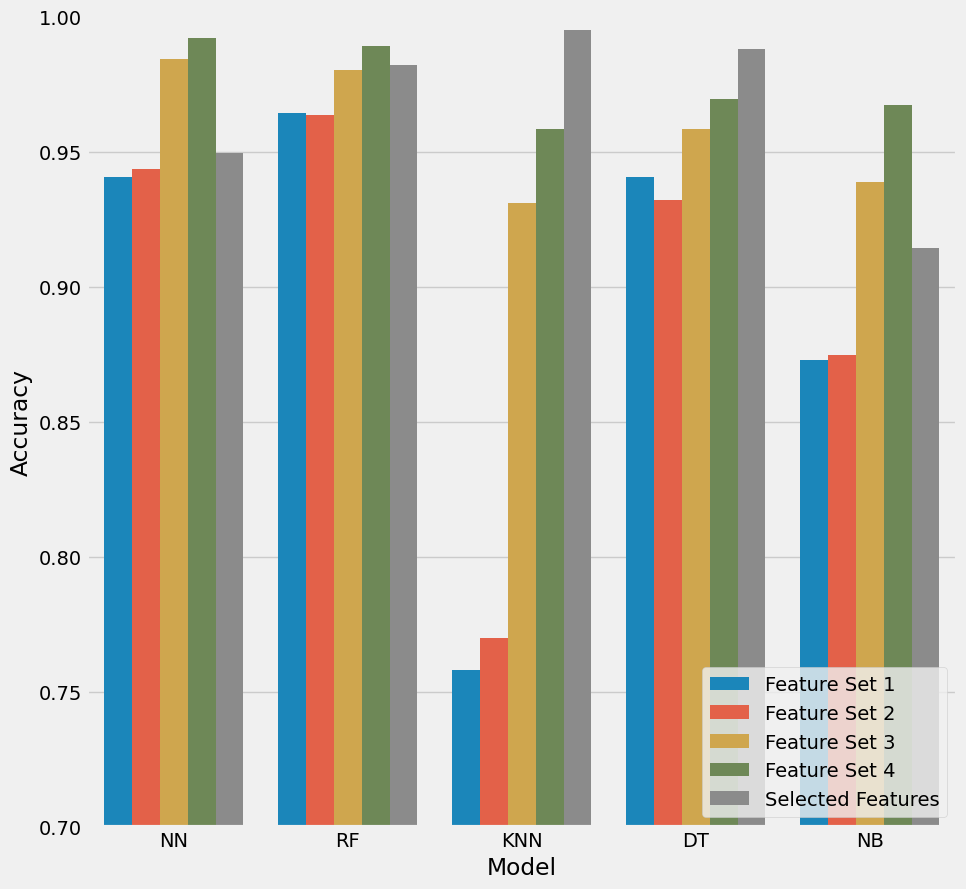

In [ ]:
score_df.sort_values(by="accuracy", ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
class_train_y, 
class_test_y, 
class_train_prob_y, 
class_test_prob_y = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

In [ ]:
accuracy = accuracy_score(y_test, class_test_y)

In [ ]:
accuracy

0.914116485686081

In [ ]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

AttributeError: 'tuple' object has no attribute 'columns'

In [ ]:
cm = confusion_matrix(y_test, class_test_y, labels=classes)

NameError: name 'classes' is not defined

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

In [ ]:
classes = class_test_prob_y.columns

In [ ]:
cm = confusion_matrix(y_test, class_test_y, labels=classes)

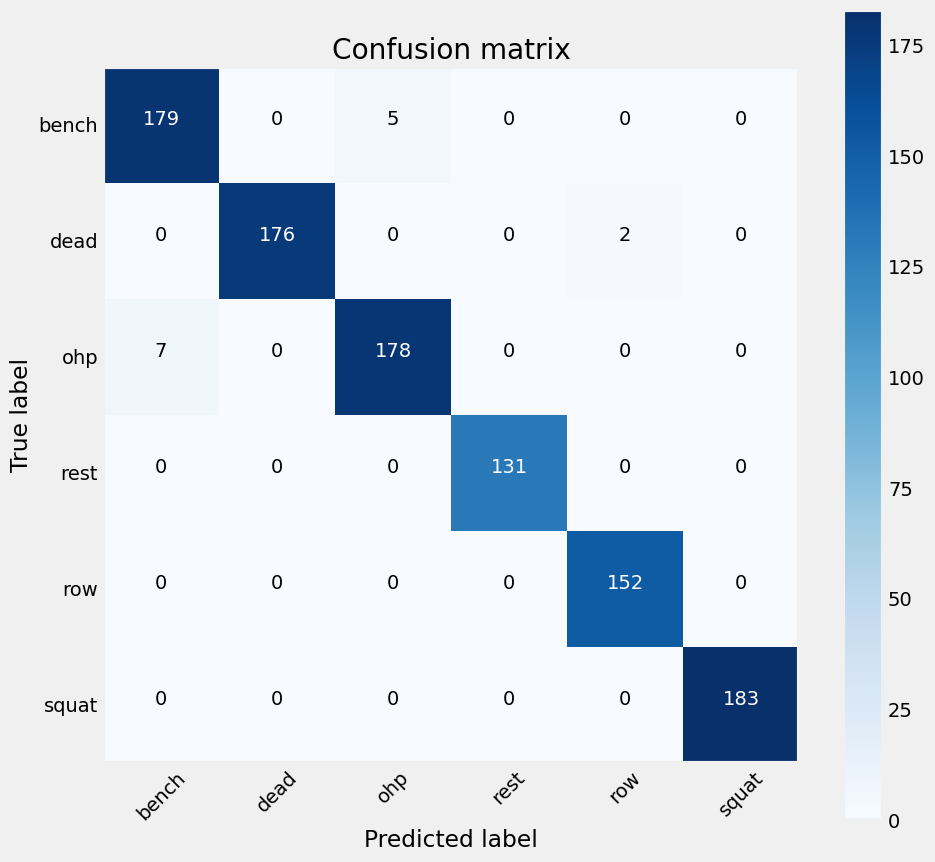

In [ ]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

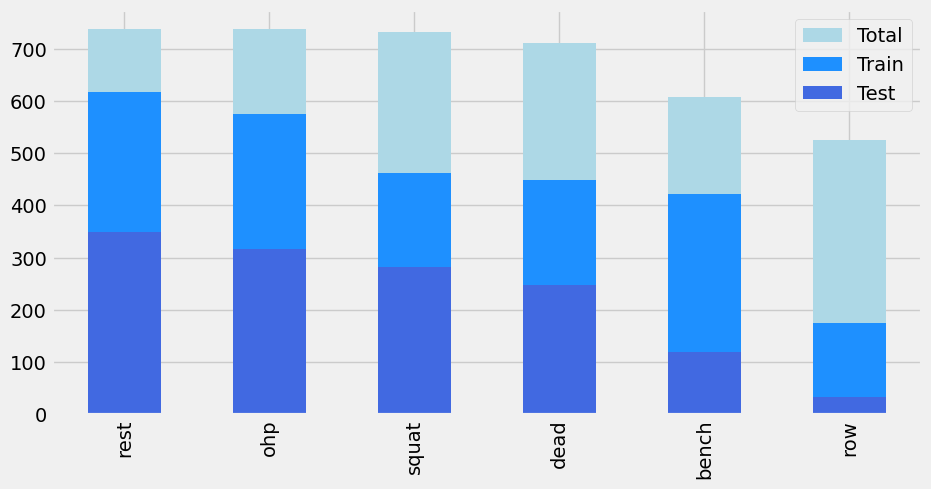

In [ ]:
participant_df = df.drop(["set", "category"], axis=1)

X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis=1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]

X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis=1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

X_train = X_train.drop(["participant"], axis=1)
X_test = X_test.drop(["participant"], axis=1)

fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

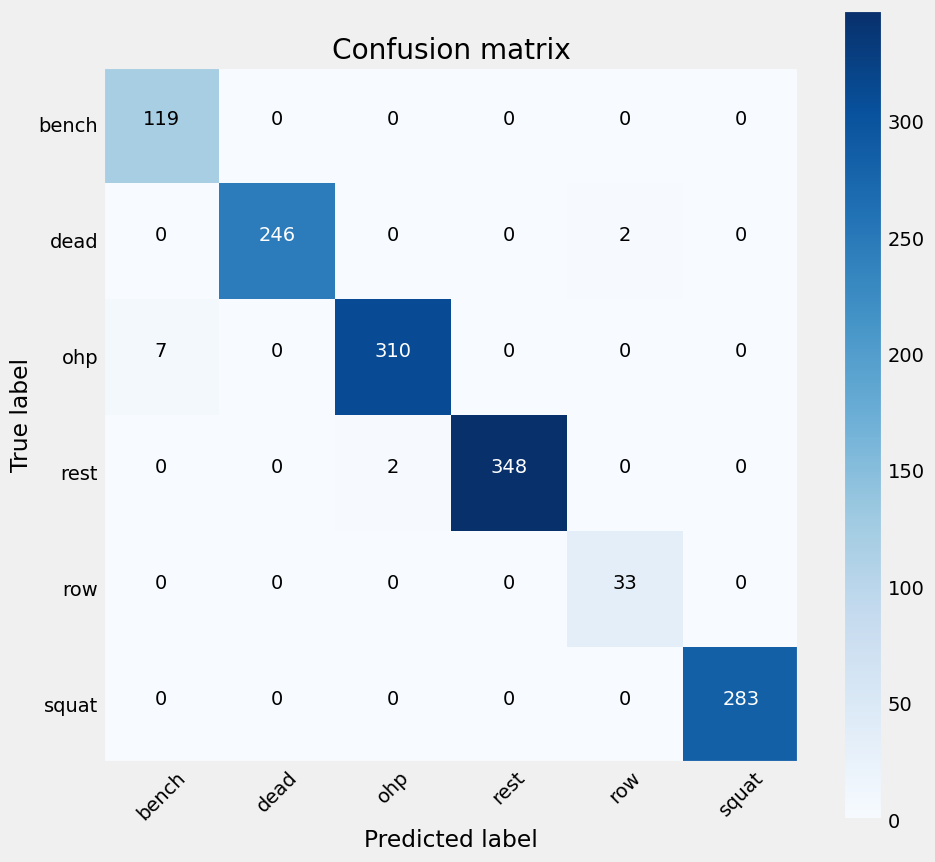

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)



accuracy = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
accuracy

0.9918518518518519

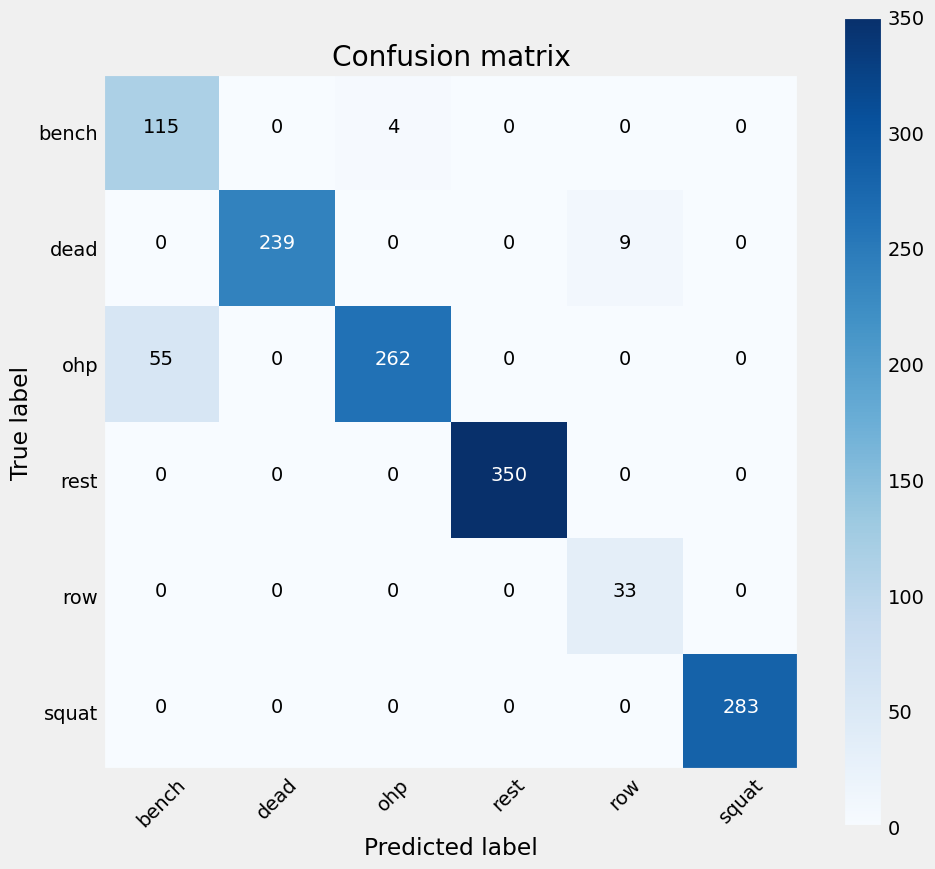

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
    X_train[selected_features], y_train, X_test[selected_features], gridsearch=False
)



accuracy = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
accuracy

0.9496296296296296

In [ ]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.940770
1,RF,Feature Set 1,0.964462
2,KNN,Feature Set 1,0.758144
3,DT,Feature Set 1,0.940770
4,NB,Feature Set 1,0.872655
0,NN,Feature Set 2,0.943731
1,RF,Feature Set 2,0.963475
2,KNN,Feature Set 2,0.769990
3,DT,Feature Set 2,0.931885
4,NB,Feature Set 2,0.874630


In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

df = pd.read_pickle("../../data/interim/03_data_features.pkl")

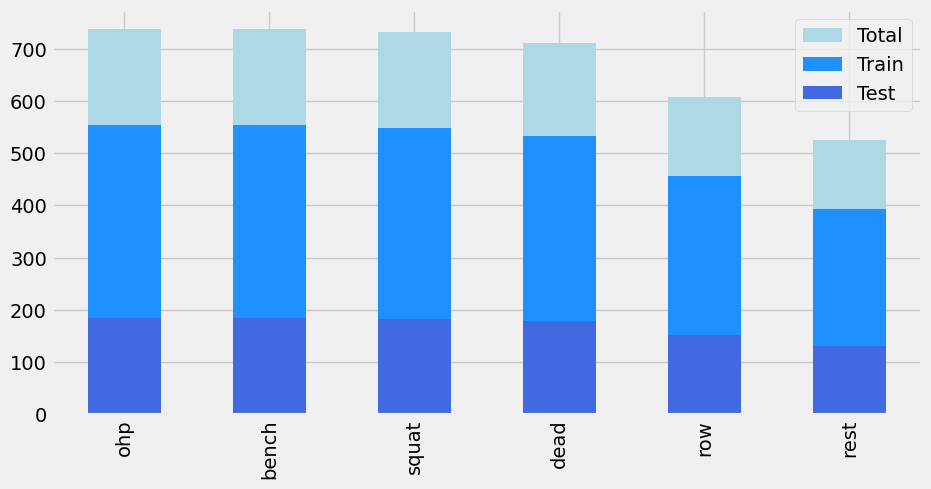

In [ ]:
df_train = df.drop(["participant", "category", "set"], axis=1)

x = df_train.drop("label", axis=1)
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if (("_freq" in f) or ("_pse" in f))]
cluster_features = ["cluster"]

print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 72
Cluster features: 1


In [ ]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features",
]

iterations = 1
score_df = pd.DataFrame()

In [ ]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0 

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
